Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       400 non-null    int64  
 1   Age                      391 non-null    float64
 2   Blood Pressure           388 non-null    float64
 3   Specific Gravity         353 non-null    float64
 4   Albumin                  354 non-null    float64
 5   Sugar                    351 non-null    float64
 6   Red Blood Cells          248 non-null    object 
 7   Pus Cell                 335 non-null    object 
 8   Pus Cell Clumps          396 non-null    object 
 9   Bacteria                 396 non-null    object 
 10  Blood Glucose Random     356 non-null    float64
 11  Blood Urea               381 non-null    float64
 12  Serum Creatinine         383 non-null    float64
 13  Sodium                   313 non-null    float64
 14  Potassium   

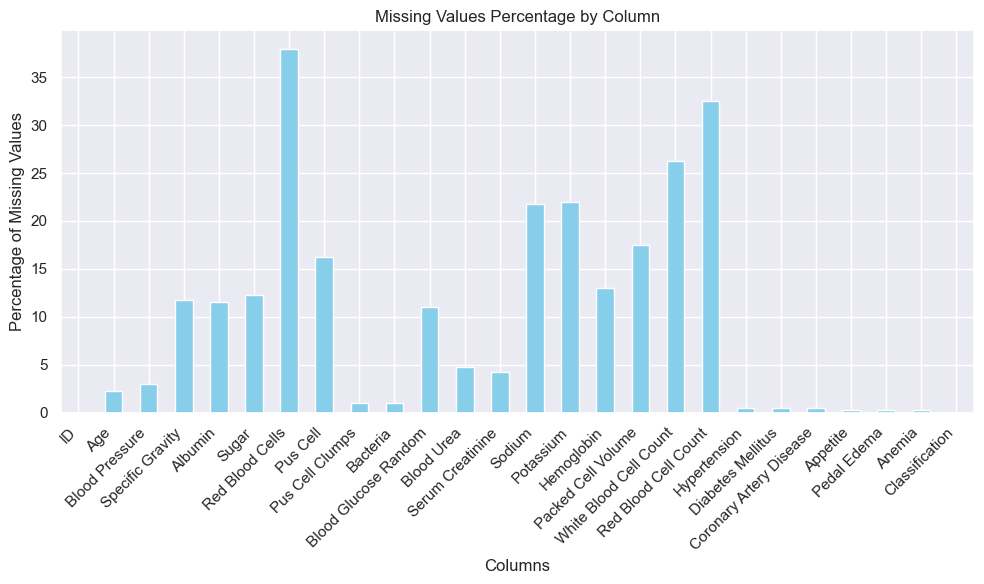


Categorical Columns (11): ['Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria', 'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite', 'Pedal Edema', 'Anemia', 'Classification']
Numerical Columns (15): ['ID', 'Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar', 'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium', 'Potassium', 'Hemoglobin', 'Packed Cell Volume', 'White Blood Cell Count', 'Red Blood Cell Count']

Missing Values After Imputation:
ID                         0
Age                        0
Blood Pressure             0
Specific Gravity           0
Albumin                    0
Sugar                      0
Red Blood Cells            0
Pus Cell                   0
Pus Cell Clumps            0
Bacteria                   0
Blood Glucose Random       0
Blood Urea                 0
Serum Creatinine           0
Sodium                     0
Potassium                  0
Hemoglobin                 0
Packed Cell Volume         0
W

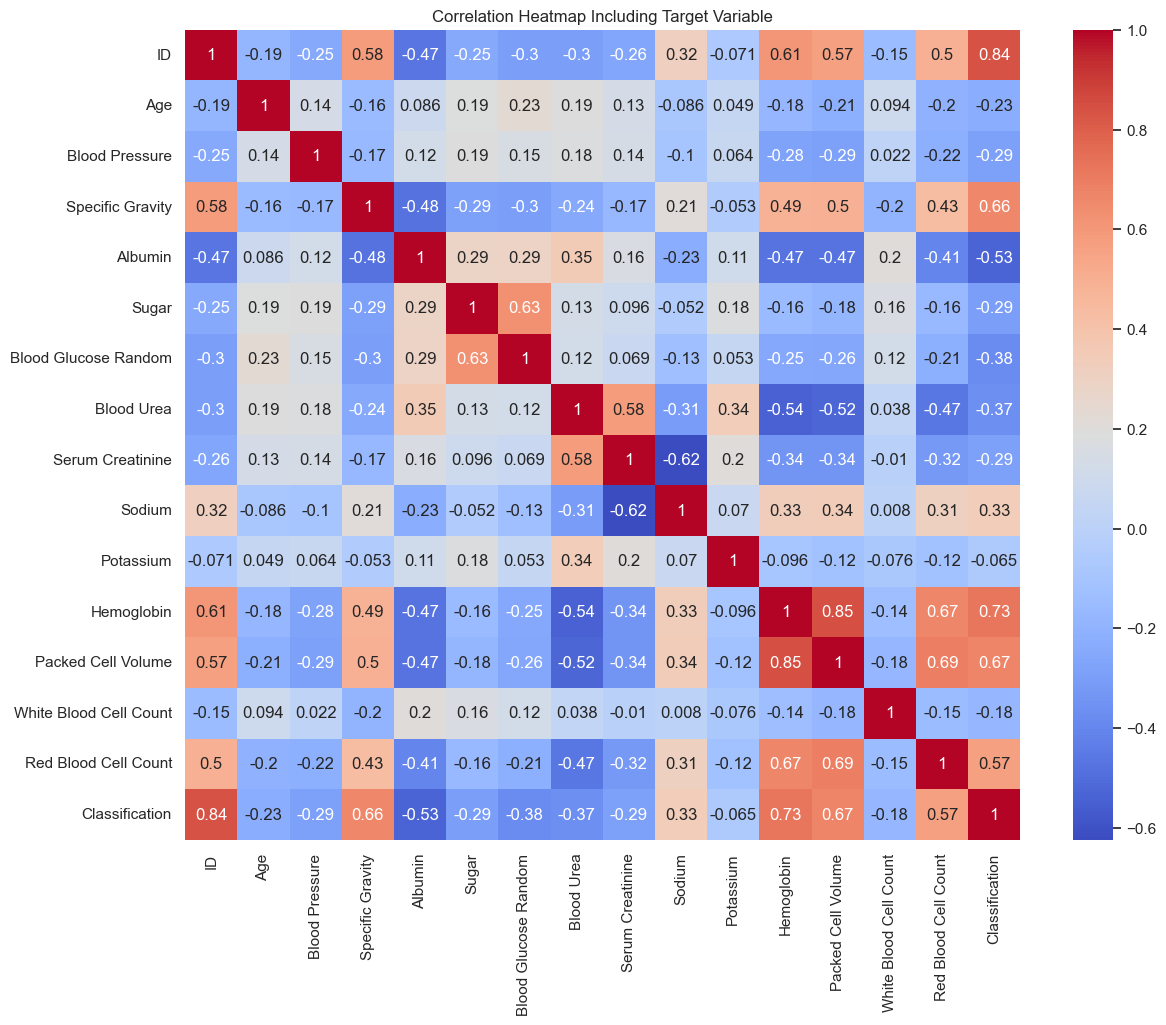


Summary Statistics After Preprocessing:
                 ID         Age  Blood Pressure  Specific Gravity  \
count  4.000000e+02  400.000000    4.000000e+02      4.000000e+02   
mean   7.105427e-17    0.000000   -2.309264e-16      3.183231e-14   
std    1.001252e+00    1.001252    1.001252e+00      1.001252e+00   
min   -1.727726e+00   -2.922015   -1.972476e+00     -2.342354e+00   
25%   -8.638630e-01   -0.563768   -4.880162e-01     -4.997944e-01   
50%    0.000000e+00    0.202662    2.542138e-01      4.214856e-01   
75%    8.638630e-01    0.733267    2.542138e-01      4.214856e-01   
max    1.727726e+00    2.266128    7.676514e+00      1.342766e+00   

            Albumin         Sugar  Blood Glucose Random    Blood Urea  \
count  4.000000e+02  4.000000e+02            400.000000  4.000000e+02   
mean   3.552714e-17 -7.105427e-17              0.000000 -1.065814e-16   
std    1.001252e+00  1.001252e+00              1.001252  1.001252e+00   
min   -6.862436e-01 -3.802694e-01            

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set matplotlib and seaborn styles
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set()

# Load the dataset
file_path = 'C:\\Users\\User\\ckd-data\\kidney_disease.csv'
CKD_Data = pd.read_csv(file_path)

# Rename columns for consistency
CKD_Data.columns = [
    'ID', 'Age', 'Blood Pressure', 'Specific Gravity', 'Albumin', 'Sugar',
    'Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria',
    'Blood Glucose Random', 'Blood Urea', 'Serum Creatinine', 'Sodium',
    'Potassium', 'Hemoglobin', 'Packed Cell Volume', 'White Blood Cell Count',
    'Red Blood Cell Count', 'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease',
    'Appetite', 'Pedal Edema', 'Anemia', 'Classification'
]

# Display dataset information
print("Dataset Info:")
CKD_Data.info()

# View missing values
print("\nMissing Values:")
print(CKD_Data.isnull().sum())

# Visualize missing values
missing_values = (CKD_Data.isna().sum() / CKD_Data.shape[0]) * 100
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values Percentage by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Handle non-standard values in categorical columns
CKD_Data['Classification'] = CKD_Data['Classification'].str.replace('ckd\t', 'ckd')
CKD_Data['Diabetes Mellitus'].replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace=True)
CKD_Data['Coronary Artery Disease'].replace({'\tno': 'no'}, inplace=True)

# Convert object type columns to numeric where appropriate
CKD_Data['Packed Cell Volume'] = pd.to_numeric(CKD_Data['Packed Cell Volume'], errors='coerce')
CKD_Data['White Blood Cell Count'] = pd.to_numeric(CKD_Data['White Blood Cell Count'], errors='coerce')
CKD_Data['Red Blood Cell Count'] = pd.to_numeric(CKD_Data['Red Blood Cell Count'], errors='coerce')

# Separate categorical and numerical columns
cat_cols = [col for col in CKD_Data.columns if CKD_Data[col].dtype == 'object']
num_cols = [col for col in CKD_Data.columns if CKD_Data[col].dtype in ['float64', 'int64']]

print(f"\nCategorical Columns ({len(cat_cols)}): {cat_cols}")
print(f"Numerical Columns ({len(num_cols)}): {num_cols}")

# Fill missing values
for col in num_cols:
    CKD_Data[col].fillna(CKD_Data[col].median(), inplace=True)

for col in cat_cols:
    CKD_Data[col].fillna(CKD_Data[col].mode()[0], inplace=True)

# Confirm missing values have been handled
print("\nMissing Values After Imputation:")
print(CKD_Data.isnull().sum())

# Encode binary categorical columns
binary_cols = ['Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease', 
               'Appetite', 'Pedal Edema', 'Anemia', 'Classification']
le = LabelEncoder()
for col in binary_cols:
    CKD_Data[col] = le.fit_transform(CKD_Data[col])

# One-hot encode categorical columns with more than two categories
categorical_columns = ['Red Blood Cells', 'Pus Cell', 'Pus Cell Clumps', 'Bacteria']
CKD_Data = pd.get_dummies(CKD_Data, columns=categorical_columns, drop_first=True)

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(CKD_Data[num_cols + ['Classification']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap Including Target Variable")
plt.show()

# Scale numerical features
scaler = StandardScaler()
CKD_Data[num_cols] = scaler.fit_transform(CKD_Data[num_cols])

# Prepare data for model training
X = CKD_Data.drop(columns=['Classification'])
y = CKD_Data['Classification']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summary statistics
print("\nSummary Statistics After Preprocessing:")
print(CKD_Data.describe())

# Save preprocessed data to CSV
preprocessed_file_path = "preprocessed_data.csv"
CKD_Data.to_csv(preprocessed_file_path, index=False)
print(f"\nPreprocessed data saved to: {preprocessed_file_path}")
